#  Cleaning Data Exercises

## Import Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np

## Import .csv files

In [11]:
banking=pd.read_csv("/home/edremit/Desktop/Datasets/banking_dirty.csv", index_col=0)
airlines=pd.read_csv("/home/edremit/Desktop/Datasets/airlines_final.csv",index_col=0)
ride_sharing=pd.read_csv("/home/edremit/Desktop/Datasets/ride_sharing_new.csv",index_col=0)

## Create Categories dataframe

In [12]:
a=airlines["cleanliness"].unique()
b=airlines["safety"].unique()
c=airlines["satisfaction"].unique()
mydict={"cleanliness":a,"safety":b,"satf":c}
categories=pd.DataFrame(mydict)

In [14]:
print(categories)

      cleanliness           safety                  satf
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satsified
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied


In [15]:
cat_clean=set(airlines["cleanliness"]).difference(categories["cleanliness"])
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

In [16]:
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


## Finding unique values of "dest_region" and "dest_size" columns:

In [18]:
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


We see that there are many inconsistent values in these columns, so we will fix it

In [21]:
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [22]:
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


Now the values are really unique

## Create ranges for categories

In [25]:
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
print(airlines["wait_type"].unique())

['medium', 'long', 'short']
Categories (3, object): ['short' < 'medium' < 'long']


## Create mappings and replace

In [26]:
print(airlines["day"].unique())

['Tuesday' 'Friday' 'Thursday' 'Wednesday' 'Saturday' 'Sunday' 'Monday']


In [27]:
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
print(airlines["day_week"].unique())

['weekday' 'weekend']


## Cleaning numbers and names

In [36]:
print(airlines.columns)

Index(['id', 'day', 'airline', 'destination', 'dest_region', 'dest_size',
       'boarding_area', 'dept_time', 'wait_min', 'cleanliness', 'safety',
       'satisfaction', 'wait_type', 'day_week'],
      dtype='object')


In [43]:
print(airlines["dest_region"].value_counts())

west us                  864
east us                  436
europe                   351
midwest us               251
asia                     226
canada/mexico            198
middle east               69
australia/new zealand     60
central/south america     22
Name: dest_region, dtype: int64


In [45]:
print(ride_sharing.columns)

Index(['duration', 'station_A_id', 'station_A_name', 'station_B_id',
       'station_B_name', 'bike_id', 'user_type', 'user_birth_year',
       'user_gender'],
      dtype='object')


In [48]:
print(ride_sharing['user_type'].unique())

[2 3 1]


In [51]:
print(banking.head())

    cust_id  birth_date  Age  acct_amount  inv_amount   fund_A   fund_B  \
0  870A9281  1962-06-09   58     63523.31       51295  30105.0   4138.0   
1  166B05B0  1962-12-16   58     38175.46       15050   4995.0    938.0   
2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   4590.0   
3  F2158F66  1985-11-03   35     84132.10       23712   3908.0    492.0   
4  7A73F334  1990-05-17   30    120512.00       93230  12158.4  51281.0   

    fund_C   fund_D account_opened last_transaction  
0   1420.0  15632.0       02-09-18         22-02-19  
1   6696.0   2421.0       28-02-19         31-10-18  
2   8469.0   1185.0       25-04-18         02-04-18  
3   6482.0  12830.0       07-11-17         08-11-18  
4  13434.0  18383.0       14-05-18         19-07-18  


## Joining Dataframes

In [52]:
print(banking.shape)

(100, 11)


In [63]:
add_column=pd.DataFrame(['dollar', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar', 'euro', 'dollar', 'euro', 'dollar', 'dollar',
                         'dollar', 'euro', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'euro', 'dollar', 'dollar', 'euro', 'euro',
                         'euro', 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 
                         'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar',
                         'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'euro', 'euro', 'euro', 'euro', 'dollar', 'dollar', 'dollar',
                         'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 
                         'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'euro', 'euro', 'euro', 
                         'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'euro', 'euro', 'dollar', 'euro', 'dollar', 'dollar', 'dollar',
                         'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'euro'], columns=["acct_cur"])

In [64]:
print(add_column.shape)

(100, 1)


In [65]:
banking=banking.join(add_column)

In [66]:
print(banking.head())

    cust_id  birth_date  Age  acct_amount  inv_amount   fund_A   fund_B  \
0  870A9281  1962-06-09   58     63523.31       51295  30105.0   4138.0   
1  166B05B0  1962-12-16   58     38175.46       15050   4995.0    938.0   
2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   4590.0   
3  F2158F66  1985-11-03   35     84132.10       23712   3908.0    492.0   
4  7A73F334  1990-05-17   30    120512.00       93230  12158.4  51281.0   

    fund_C   fund_D account_opened last_transaction acct_cur  
0   1420.0  15632.0       02-09-18         22-02-19   dollar  
1   6696.0   2421.0       28-02-19         31-10-18   dollar  
2   8469.0   1185.0       25-04-18         02-04-18   dollar  
3   6482.0  12830.0       07-11-17         08-11-18     euro  
4  13434.0  18383.0       14-05-18         19-07-18     euro  


## Convert acct_amount where it is in euro to dollars

In [67]:
p= banking.loc[banking["acct_cur"]=="euro", "acct_amount"] 
p=p*(1.1)

## Convert "euro" to "dollar" in acct_cur column, don't forget to add "inplace=True"

In [77]:
banking["acct_cur"].replace("euro","dollar", inplace=True)

In [78]:
print(banking.head())

    cust_id  birth_date  Age  acct_amount  inv_amount   fund_A   fund_B  \
0  870A9281  1962-06-09   58     63523.31       51295  30105.0   4138.0   
1  166B05B0  1962-12-16   58     38175.46       15050   4995.0    938.0   
2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   4590.0   
3  F2158F66  1985-11-03   35     84132.10       23712   3908.0    492.0   
4  7A73F334  1990-05-17   30    120512.00       93230  12158.4  51281.0   

    fund_C   fund_D account_opened last_transaction acct_cur  
0   1420.0  15632.0       02-09-18         22-02-19   dollar  
1   6696.0   2421.0       28-02-19         31-10-18   dollar  
2   8469.0   1185.0       25-04-18         02-04-18   dollar  
3   6482.0  12830.0       07-11-17         08-11-18   dollar  
4  13434.0  18383.0       14-05-18         19-07-18   dollar  


## Check if all rows of acct_cur column is "dollar", with the help of "assert"

In [80]:
assert banking['acct_cur'].unique() == 'dollar'

## Creating a 'acct_year' column from account_opened column

In [81]:
banking['account_opened'] = pd.to_datetime(banking['account_opened'],infer_datetime_format = True,errors ='coerce')

In [82]:
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

In [85]:
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


## Data Integrity

In [86]:
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [93]:
print(consistent_inv.shape)

(92, 13)


In [94]:
print(banking.shape)

(100, 13)


In [97]:
import datetime as dt

In [122]:
today = dt.date.today()
ages_manual = today.year - pd.DatetimeIndex(banking['birth_date']).year -1
age_equ = banking['Age'] == ages_manual
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

In [123]:
print(inconsistent_ages.shape)

(8, 13)


In [124]:
print(consistent_ages.shape)

(92, 13)


## Missing Values

In [140]:
import missingno as msno
import matplotlib.pyplot as plt

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


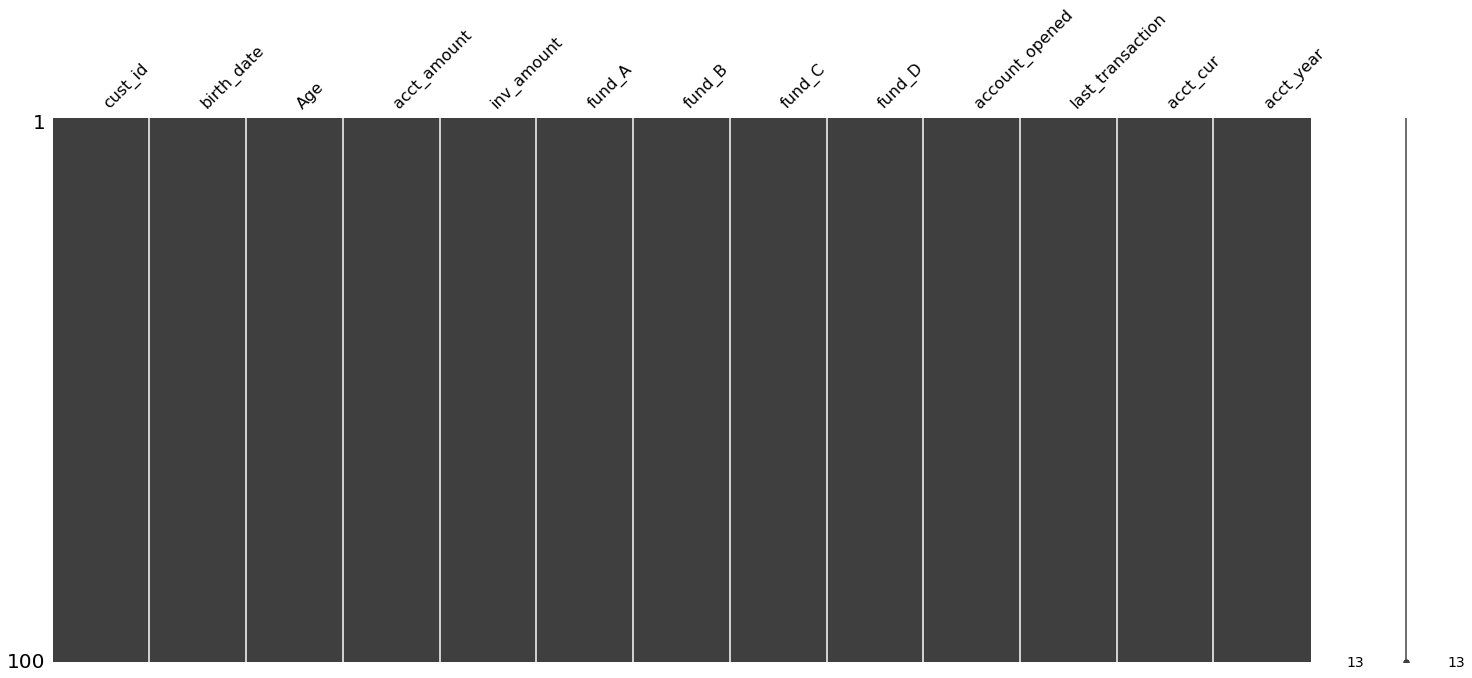

In [141]:
print(banking.isna().sum())
msno.matrix(banking)
plt.show()